In [2]:
import numpy as np #may not need it, but its good to have it :)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #overrides the styles and graphics of all matplotlib graphs

from sklearn.linear_model import LinearRegression #Instead of stastsmodels.api we use sklearn

In [5]:
data = pd.read_csv('1.01. linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [8]:
x = data['SAT']
y = data['GPA']

In [9]:
x.shape

(84,)

In [10]:
y.shape

(84,)

In [15]:
# Need to reshape the dimension of array from 1d to 2d. As sklearn is not the fan of 1d arrays :)
# This is the issue only in simple linear regression. Sklearn expects dozens of features.

In [40]:
x_matrix = x.values.reshape(84,1)
#(-1,1 ) will work too

In [41]:
x_matrix.shape

(84, 1)

#### Regresion begins

In [42]:
reg = LinearRegression()
#reg is an instance of LinearRegression() class

In [43]:
#x is input
#y is target
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### R-squared

In [44]:
reg.score(x_matrix, y)

0.40600391479679765

In [45]:
#The R-sqaured result is same as that we found with statsmodels table (refer to folder 1)

#### Coefficients

In [46]:
reg.coef_

array([0.00165569])

The result is in ndarray containing all the coefs. When you perform multiple regressions you will find arrays for each of the features.

#### Intercept

In [47]:
reg.intercept_

0.2750402996602803

This time we got float instead of array, because linear regression always has single intercept.

### Making Predictions

In [48]:
reg.predict([[1740]])

array([3.15593751])

The result is in array, because the predict() function can take multiple args. Newer versions of Scikit-learn require 2D inputs for the predict function. Let me show you...

In [51]:
new_data = pd.DataFrame(data=[1740, 1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [52]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [54]:
new_data['Predicted GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


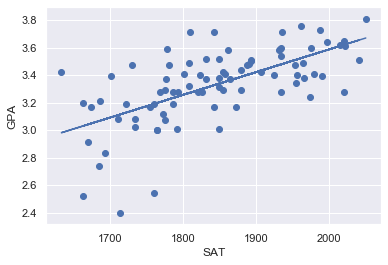

In [56]:
plt.scatter(x,y)

yhat = reg.coef_*x_matrix + reg.intercept_

fig = plt.plot(x,yhat) #best fitting line

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()